In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline
from scipy import stats

import seaborn as sns


In [39]:
Data_Directory = './Arduino_Adafruit/Data'

file = Data_Directory + '/rssi_data_20240930_141845_1m.csv'

In [40]:
df = pd.read_csv(file)

# Display the first few rows of the DataFrame
df

,Timestamp,RSSI
0,294441,-72
1,294449,-72
2,294452,-72
3,294458,0
4,294465,-71
...,...,...
1159,306262,-76
1160,306274,-80
1161,306286,-75
1162,306293,-75


#### Drop RSSI = 0 rows and normalise timestamp

In [41]:
df = df.drop(df[df['RSSI'] == 0].index)

# Normalize the Timestamp by subtracting the first value
df['Timestamp'] = df['Timestamp'] - df['Timestamp'].iloc[0]

# Display the resulting DataFrame
df

,Timestamp,RSSI
0,0,-72
1,8,-72
2,11,-72
4,24,-71
5,34,-72
...,...,...
1159,11821,-76
1160,11833,-80
1161,11845,-75
1162,11852,-75


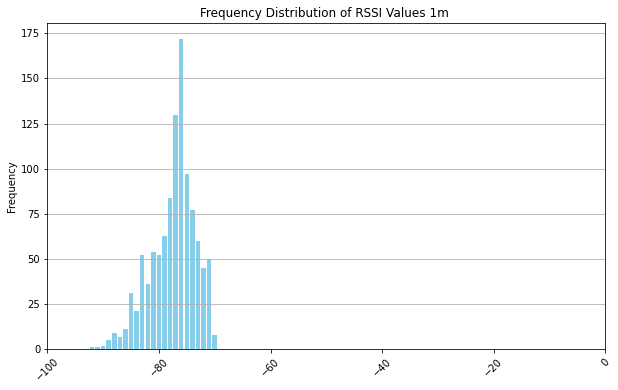

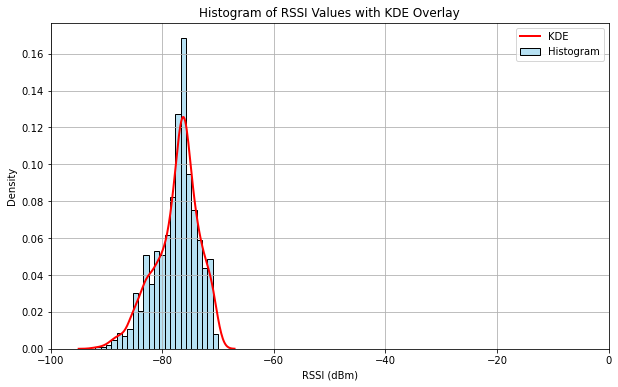

In [42]:
rssi_counts = df['RSSI'].value_counts().sort_index()

# Plot the frequency distribution as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(rssi_counts.index, rssi_counts.values, color='skyblue')
plt.xlim(-100, -0)  
plt.ylabel('Frequency')
plt.title('Frequency Distribution of RSSI Values 1m ')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Show the plot
plt.show()

rssi_values = df['RSSI'] 

# Set up the plot
plt.figure(figsize=(10, 6))

# Plot the histogram
sns.histplot(rssi_values, kde=False, color='skyblue', stat='density', label='Histogram', alpha=0.6)
# Overlay the KDE
sns.kdeplot(rssi_values, color='red', label='KDE', linewidth=2)

# Final plot settings
plt.xlabel('RSSI (dBm)')
plt.ylabel('Density')
plt.title('Histogram of RSSI Values with KDE Overlay')
plt.legend()
plt.grid()
plt.xlim(-100, 0)  # Adjust based on your data range
plt.show()

In [43]:
rssi_values = df['RSSI']
mean_rssi = np.mean(rssi_values)
median_rssi = np.median(rssi_values)
mode_rssi = rssi_values.mode()[0]  

print(mean_rssi)
print(median_rssi)
print(mode_rssi)


-77.40636704119851
-77.0
-76


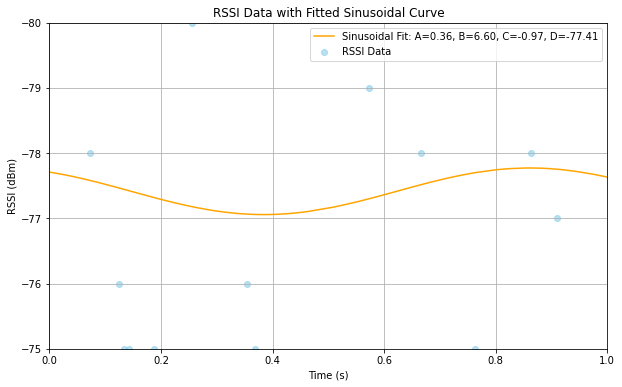

In [44]:
def sinusoidal(t, A, B, C, D):
    return A * np.sin(B * t + C) + D

time_ms = df['Timestamp']  # Time in milliseconds
time = time_ms / 1000  # Convert to seconds for the fitting


# Initial guess for the parameters [Amplitude, Frequency, Phase, Offset]
initial_guess = [1, 2 * np.pi, 0, np.mean(rssi_values)]

# Perform the curve fitting
params, params_covariance = curve_fit(sinusoidal, time, rssi_values, p0=initial_guess)

# Plot the original data
plt.figure(figsize=(10, 6))
plt.scatter(time, rssi_values, label='RSSI Data', color='skyblue', alpha=0.6)

# Plot the fitted sinusoidal curve
fitted_values = sinusoidal(time, *params)
plt.plot(time, fitted_values, label=f'Sinusoidal Fit: A={params[0]:.2f}, B={params[1]:.2f}, C={params[2]:.2f}, D={params[3]:.2f}', color='orange')

# Adjust x-axis to show the time between 0 and 1 second
plt.xlim(0, 1)

# Final plot settings
plt.xlabel('Time (s)')
plt.ylim(-75,-80)
plt.ylabel('RSSI (dBm)')
plt.title('RSSI Data with Fitted Sinusoidal Curve')
plt.legend()
plt.grid()
plt.show()

## 2m distance

In [45]:

file = Data_Directory + '/rssi_data_20240930_141953_2m.csv'

In [46]:
df = pd.read_csv(file)

# Display the first few rows of the DataFrame
df

,Timestamp,RSSI
0,362500,-85
1,362508,-86
2,362517,-88
3,362530,-86
4,362536,-86
...,...,...
2072,380631,0
2073,380642,0
2074,380654,-84
2075,380667,-87


#### Drop RSSI = 0 rows and normalise timestamp

In [47]:
df = df.drop(df[df['RSSI'] == 0].index)

# Normalize the Timestamp by subtracting the first value
df['Timestamp'] = df['Timestamp'] - df['Timestamp'].iloc[0]

# Display the resulting DataFrame
df

,Timestamp,RSSI
0,0,-85
1,8,-86
2,17,-88
3,30,-86
4,36,-86
...,...,...
2069,18105,-82
2071,18121,-84
2074,18154,-84
2075,18167,-87


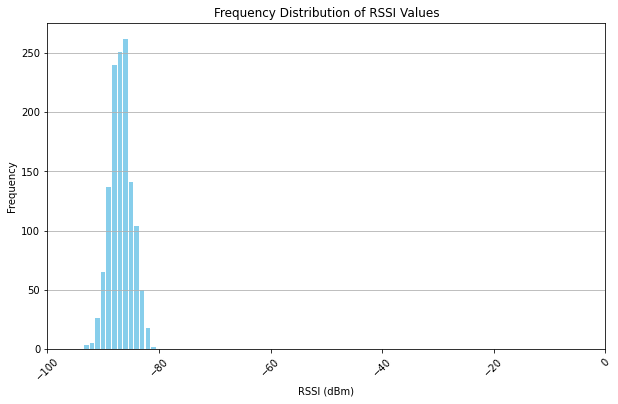

In [48]:
rssi_counts = df['RSSI'].value_counts().sort_index()

# Plot the frequency distribution as a bar plot
plt.figure(figsize=(10, 6))
plt.bar(rssi_counts.index, rssi_counts.values, color='skyblue')
plt.xlim(-100, -0)  
plt.xlabel('RSSI (dBm)')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of RSSI Values')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')

# Show the plot
plt.show()

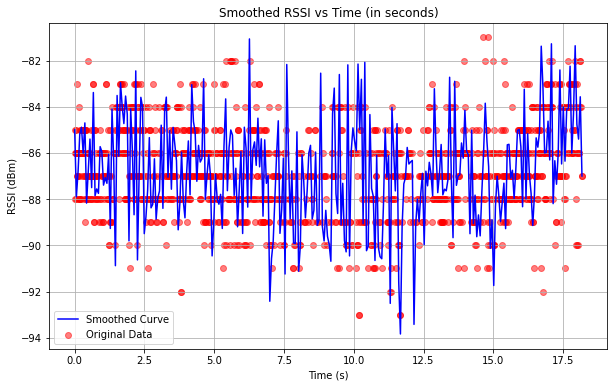

In [49]:
df['Timestamp_s'] = df['Timestamp'] / 1000

# Generate a smooth curve for RSSI vs Timestamp (in seconds) using cubic interpolation
x = df['Timestamp_s']
y = df['RSSI']

# Define 300 evenly spaced points for smoothness
x_smooth = np.linspace(x.min(), x.max(), 300)

# Apply cubic interpolation
spl = make_interp_spline(x, y, k=3)  # k=3 is cubic interpolation
y_smooth = spl(x_smooth)

# Plot the smoothed RSSI against time (in seconds)
plt.figure(figsize=(10, 6))
plt.plot(x_smooth, y_smooth, color='b', label='Smoothed Curve')

# Plot the original data points
plt.scatter(x, y, color='r', label='Original Data', alpha=0.5)

# Set graph labels and title
plt.xlabel('Time (s)')
plt.ylabel('RSSI (dBm)')
plt.title('Smoothed RSSI vs Time (in seconds)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()